# Correlation analysis




<subheading>Importing the necessary libraries</subheading>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from math import ceil

### The Dataset

The Different Attributes in the dataset are: 
- id : text 
- Artist : text 
- Album : text 
- Decade : text 
- <b>Sales_total : number </b>
- <b>Sales_US : number</b>
- Description : Text
- Author : Text

In [4]:
dataframe = pd.read_csv('../data/preprocessed.csv') 
dataframe.head(3)

,id,artist,album,decade,sales_total,sales_us,description,author
0,25-the-beatles-sgt-pepper-s-lonely-hearts-club...,The Beatles,Sgt. Pepper’s Lonely Hearts Club Band,60s,1800000,1100000,decade defined sweeping cultural paradigm shif...,Max Blau
1,24-pink-floyd-the-wall,Pink Floyd,The Wall,70s,1800000,1100000,legacy pink floyd cemented dark side moon . wa...,Clint Alwahab
2,23-michael-jackson-bad,Michael Jackson,Bad,80s,1900000,1000000,bizarre consider album five consecutive number...,Josh Jackson


> Correlation is a metric that gives insights on the numerical assoiation between two variables. 

Here, two variables in particular namely the <b>Total Sales</b> and <b>U.S. Sales</b> have some kind of numerical association that can be better interpreted using the correlation analysis

The correlation measures taken into consideration here are: 
- Pearson Coefficient 
- Spearman Coefficient 

### Interpretation of the Pearson Coefficient

Range of Values:  -1 to +1 
Interpretation of the value: 
    - +1 signifies a strong positive association 
    - -1 signifies a strong negative association 
    - 0 signifies no assocation

In [3]:
sales = dataframe[['sales_total', 'sales_us']]
pearson = stats.pearsonr(sales['sales_total'],sales['sales_us'] )[0]
print("Pearson Coefficient between Total Sales and U.S. Sales:" , stats.pearsonr(sales['sales_total'],sales['sales_us'] )[0])

Pearson Coefficient between Total Sales and U.S. Sales: 0.8881793629551367


> This which signifies a <i>strong positive correlation</i> between the two variables.  

#### Verification using a scatter plot between Total Sales and U.S. Sales

Text(0.5, 1.0, 'Pearson Coefficient Plot')

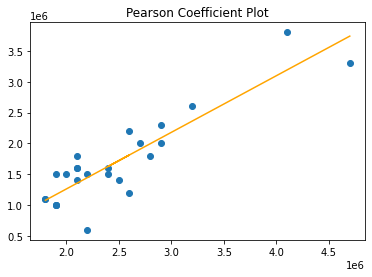

In [8]:
x,y = np.array(sales['sales_total']), np.array(sales['sales_us'])
plt.scatter(x,y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color="orange")
plt.title('Pearson Coefficient Plot')



##### Insights from the scatter plot: 

Though points appear to be somewhat linear, more data would help in a better conclusion on the linear correlation of the data given. 


### Interpretation of the Spearman Coefficient

In [5]:
spearman =  stats.spearmanr(sales['sales_total'],sales['sales_us'] )[0]
print("Spearman Coefficient between Total Sales and U.S. Sales:" , stats.spearmanr(sales['sales_total'],sales['sales_us'] )[0])
print("Difference between Pearson and Spearman Coefficient Values: ", ceil((pearson-spearman)*100), "%")

Spearman Coefficient between Total Sales and U.S. Sales: 0.7797400894488049
Difference between Pearson and Spearman Coefficient Values:  11 %


There is almost a 11% difference between the pearson and spearman coefficients. This could be attributed for the fact that the pearson coefficient assumes the data is normally distributed. 

Text(0, 0.5, 'Frequency')

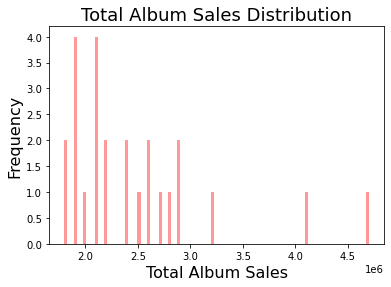

In [11]:

hplot = sns.distplot(sales['sales_total'], kde=False, color='red', bins=100)
plt.title('Total Album Sales Distribution', fontsize=18)
plt.xlabel('Total Album Sales', fontsize=16)
plt.ylabel('Frequency' , fontsize=16)



Text(0, 0.5, 'Frequency')

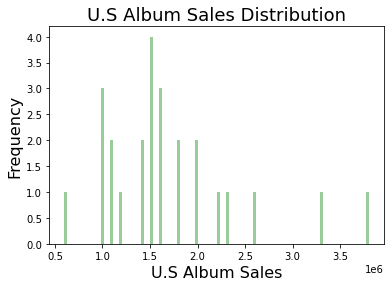

In [10]:
hplot = sns.distplot(sales['sales_us'], kde=False, color='green', bins=100)
plt.title('U.S Album Sales Distribution', fontsize=18)
plt.xlabel('U.S Album Sales', fontsize=16)
plt.ylabel('Frequency' , fontsize=16)


This shows that Total Album sales is not normally distributed. And this assumption could be one of the factors accounting for that 11% difference between both the coefficient values. 